# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [75]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress, pearsonr
from pprint import pprint

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [76]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 615


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [77]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + "appid=" + weather_api_key + "&q=" + city
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | gladstone
Processing Record 2 of Set 1 | beringovskiy
Processing Record 3 of Set 1 | ayan
Processing Record 4 of Set 1 | sunzha
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | mar del plata
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | karratha
Processing Record 9 of Set 1 | kimbe
Processing Record 10 of Set 1 | qaqortoq
Processing Record 11 of Set 1 | dingle
Processing Record 12 of Set 1 | neuquen
Processing Record 13 of Set 1 | tigre
Processing Record 14 of Set 1 | kapaa
Processing Record 15 of Set 1 | fortuna
Processing Record 16 of Set 1 | barrow
Processing Record 17 of Set 1 | paluan
Processing Record 18 of Set 1 | merauke
Processing Record 19 of Set 1 | paamiut
Processing Record 20 of Set 1 | qaanaaq
Processing Record 21 of Set 1 | zhezkazgan
Processing Record 22 of Set 1 | bar harbor
Processing Record 23 of Set 1 | georgetown
Processing Rec

In [78]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)
city_data_df.to_csv("city_data.csv", index=False)
# Show Record Count
city_data_df.count()

City          571
Lat           571
Lng           571
Max Temp      571
Humidity      571
Cloudiness    571
Wind Speed    571
Country       571
Date          571
dtype: int64

In [79]:
city_data_df = pd.read_csv("city_data.csv")

In [80]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,gladstone,-23.8500,151.2500,297.11,46,75,7.72,AU,1667806860
1,beringovskiy,63.0500,179.3167,273.10,100,100,3.02,RU,1667806860
2,ayan,56.4500,138.1667,265.22,52,63,8.07,RU,1667806860
3,sunzha,43.3211,45.0522,278.23,58,7,5.36,RU,1667806861
4,albany,42.6001,-73.9662,293.37,91,93,0.45,US,1667806615


In [81]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [82]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

def  K_to_C(x):
    return x-273.15

city_data_df['Max Temp'] = city_data_df['Max Temp'].apply(K_to_C)

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,gladstone,-23.8500,151.2500,23.96,46,75,7.72,AU,1667806860
1,beringovskiy,63.0500,179.3167,-0.05,100,100,3.02,RU,1667806860
2,ayan,56.4500,138.1667,-7.93,52,63,8.07,RU,1667806860
3,sunzha,43.3211,45.0522,5.08,58,7,5.36,RU,1667806861
4,albany,42.6001,-73.9662,20.22,91,93,0.45,US,1667806615


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

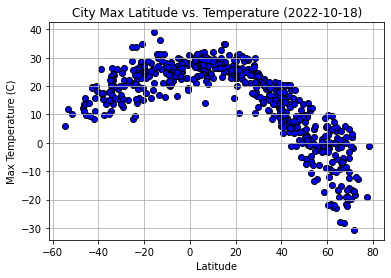

In [83]:
# Build scatter plot for latitude vs. temperature
lat_2 = city_data_df['Lat']
temp = city_data_df['Max Temp']

# Incorporate the other graph properties
plt.scatter(lat_2,temp, marker='o', facecolors='blue', edgecolors='black', alpha=1.0)
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title('City Max Latitude vs. Temperature (2022-10-18)')
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

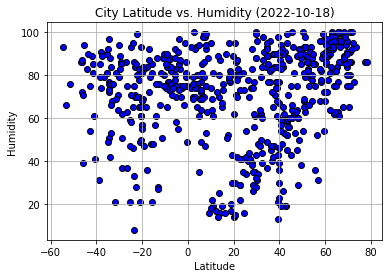

In [84]:
# Build the scatter plots for latitude vs. humidity
lat_2 = city_data_df['Lat']
humidity = city_data_df['Humidity']
# Incorporate the other graph properties
plt.scatter(lat_2,humidity, marker='o', facecolors='blue', edgecolors='black', alpha=1.0)
plt.xlabel("Latitude")
plt.ylabel("Humidity")
plt.title('City Latitude vs. Humidity (2022-10-18)')
plt.grid(True)
# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

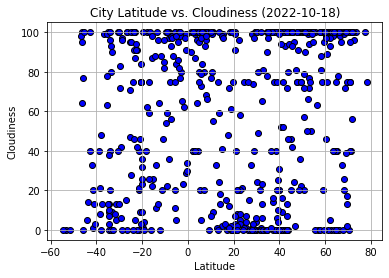

In [85]:
# Build the scatter plots for latitude vs. cloudiness
lat_2 = city_data_df['Lat']
cloudiness = city_data_df['Cloudiness']

# Incorporate the other graph properties
plt.scatter(lat_2, cloudiness, marker='o', facecolors='blue', edgecolors='black', alpha=1.0)
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")
plt.title('City Latitude vs. Cloudiness (2022-10-18)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

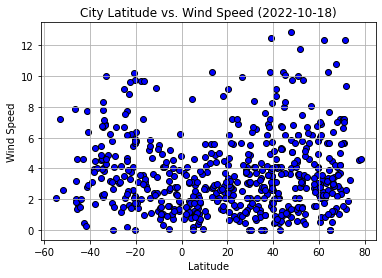

In [86]:
# Build the scatter plots for latitude vs. wind speed
lat_2 = city_data_df['Lat']
windy = city_data_df['Wind Speed']


# Incorporate the other graph properties
plt.scatter(lat_2, windy, marker='o', facecolors='blue', edgecolors='black', alpha=1.0)
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.title('City Latitude vs. Wind Speed (2022-10-18)')
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()


 Compute Linear Regression for Each Relationship


In [87]:
# Define a function to create Linear Regression plots
def create_lin_regression_plot(x, y, x_str, y_str):
    # Find lin regression
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    regress_val= (x * slope + intercept)
    correlation= pearsonr(x, y)
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    # Incorporate the other graph properties
    plt.scatter(x, y, facecolors='blue', alpha=1.0)
    plt.plot(x, regress_val, "r-")
    plt.xlabel(x_str)
    plt.ylabel(y_str)
    plt.legend([line_eq], labelcolor='r')
    plt.savefig(f"output_data/{x_str}_vs_{y_str}.png")
    print(f"The r-value is {rvalue**2}")
    plt.show()

In [90]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
# YOUR CODE HERE
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]
# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,beringovskiy,63.0500,179.3167,-0.05,100,100,3.02,RU,1667806860
2,ayan,56.4500,138.1667,-7.93,52,63,8.07,RU,1667806860
3,sunzha,43.3211,45.0522,5.08,58,7,5.36,RU,1667806861
4,albany,42.6001,-73.9662,20.22,91,93,0.45,US,1667806615
9,qaqortoq,60.7167,-46.0333,-1.77,95,89,0.50,GL,1667806862


In [91]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,gladstone,-23.8500,151.2500,23.96,46,75,7.72,AU,1667806860
5,mar del plata,-38.0023,-57.5575,15.53,91,0,5.36,AR,1667806861
6,punta arenas,-53.1500,-70.9167,12.06,66,0,7.20,CL,1667806569
7,karratha,-20.7377,116.8463,25.12,49,9,10.24,AU,1667806862
8,kimbe,-5.5502,150.1429,25.31,92,100,1.53,PG,1667806862


###  Temperature vs. Latitude Linear Regression Plot

The r-value is 0.7801126812857239


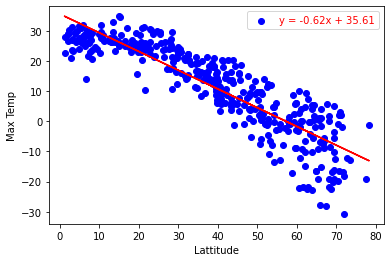

In [92]:
# Linear regression on Northern Hemisphere
lat_n = northern_hemi_df['Lat']
temp_n = northern_hemi_df['Max Temp']
temp_s = southern_hemi_df['Max Temp']
lat_s = southern_hemi_df['Lat']
humid_n = northern_hemi_df['Humidity']
humid_s = southern_hemi_df['Humidity']
windy_n = northern_hemi_df['Wind Speed']
windy_s = southern_hemi_df['Wind Speed']
cloudiness_n= northern_hemi_df['Cloudiness']
cloudiness_s= southern_hemi_df['Cloudiness']
create_lin_regression_plot(lat_n, temp_n, "Lattitude", "Max Temp")

The r-value is 0.38887396570536803


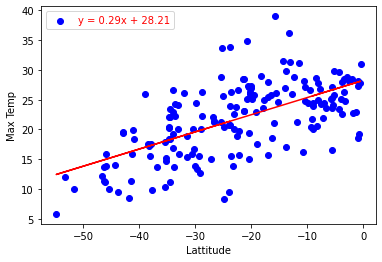

In [93]:
# Linear regression on Southern Hemisphere
create_lin_regression_plot(lat_s, temp_s, "Lattitude", "Max Temp")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Humidity vs. Latitude Linear Regression Plot

The r-value is 0.10836713691847744


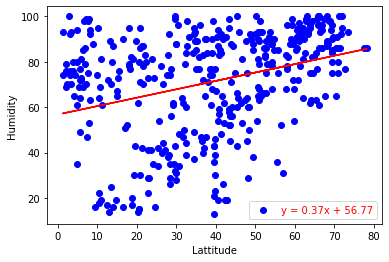

In [94]:
# Northern Hemisphere
create_lin_regression_plot(lat_n, humid_n, "Lattitude", "Humidity")

The r-value is 0.001654709957125775


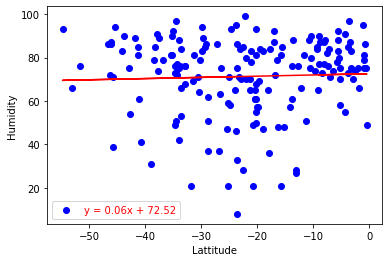

In [95]:
# Southern Hemisphere
create_lin_regression_plot(lat_s, humid_s, "Lattitude", "Humidity")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is 0.026948713134896954


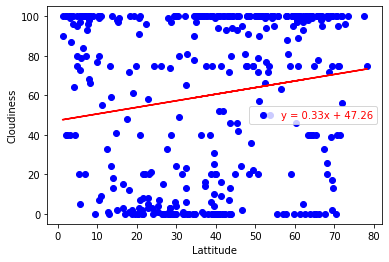

In [96]:
# Northern Hemisphere
create_lin_regression_plot(lat_n, cloudiness_n, "Lattitude", "Cloudiness")

The r-value is 0.08889138052630546


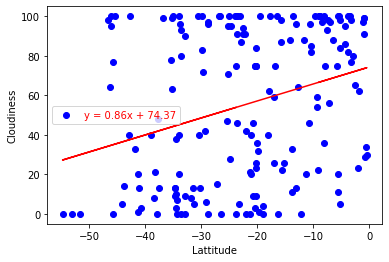

In [97]:
# Southern Hemisphere
create_lin_regression_plot(lat_s, cloudiness_s, "Lattitude", "Cloudiness")

**Discussion about the linear relationship:** YOUR RESPONSE HERE

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is 0.043642051250527523


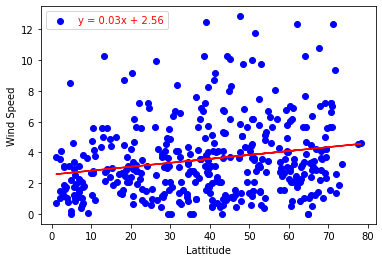

In [98]:
# Northern Hemisphere
create_lin_regression_plot(lat_n, windy_n, "Lattitude", "Wind Speed")

The r-value is 0.03458198316584727


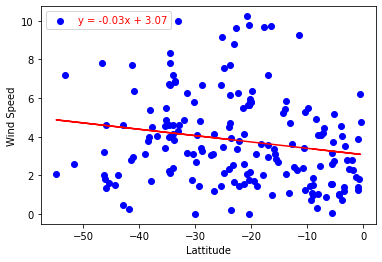

In [99]:
# Southern Hemisphere
create_lin_regression_plot(lat_s, windy_s, "Lattitude", "Wind Speed")

**Discussion about the linear relationship:** YOUR RESPONSE HERE